In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)

# --- Initial Data Exploration ---

# 1. View the first 5 rows of the data
print("First 5 rows of the dataset:")
display(df.head())

# 2. Get information about columns and data types
print("\nDataset Information:")
df.info()

# 3. Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

# 4. Check the distribution of our target variable 'Churn'
print("\nChurn Distribution:")
print(df['Churn'].value_counts())

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [2]:
# --- Data Cleaning and Preprocessing ---

# 1. Handle the 'TotalCharges' column
# Convert to numeric, coercing errors to NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop the few rows with missing values
df.dropna(inplace=True)

# 2. Drop the customerID column
df.drop('customerID', axis=1, inplace=True)

# 3. Convert the target variable 'Churn' to numerical (1 for Yes, 0 for No)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 4. Convert all other categorical variables into dummy/indicator variables (One-Hot Encoding)
df_dummies = pd.get_dummies(df)

print("Data after cleaning and one-hot encoding:")
display(df_dummies.head())

print("\nShape of the new dataframe:", df_dummies.shape)
df_dummies.info()

Data after cleaning and one-hot encoding:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False



Shape of the new dataframe: (7032, 46)
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   bool   
 6   gender_Male                              7032 non-null   bool   
 7   Partner_No                               7032 non-null   bool   
 8   Partner_Yes                              7032 non-null   bool   
 9   Dependents_No                            7032 non-null   bool   
 10  Dependents_Ye

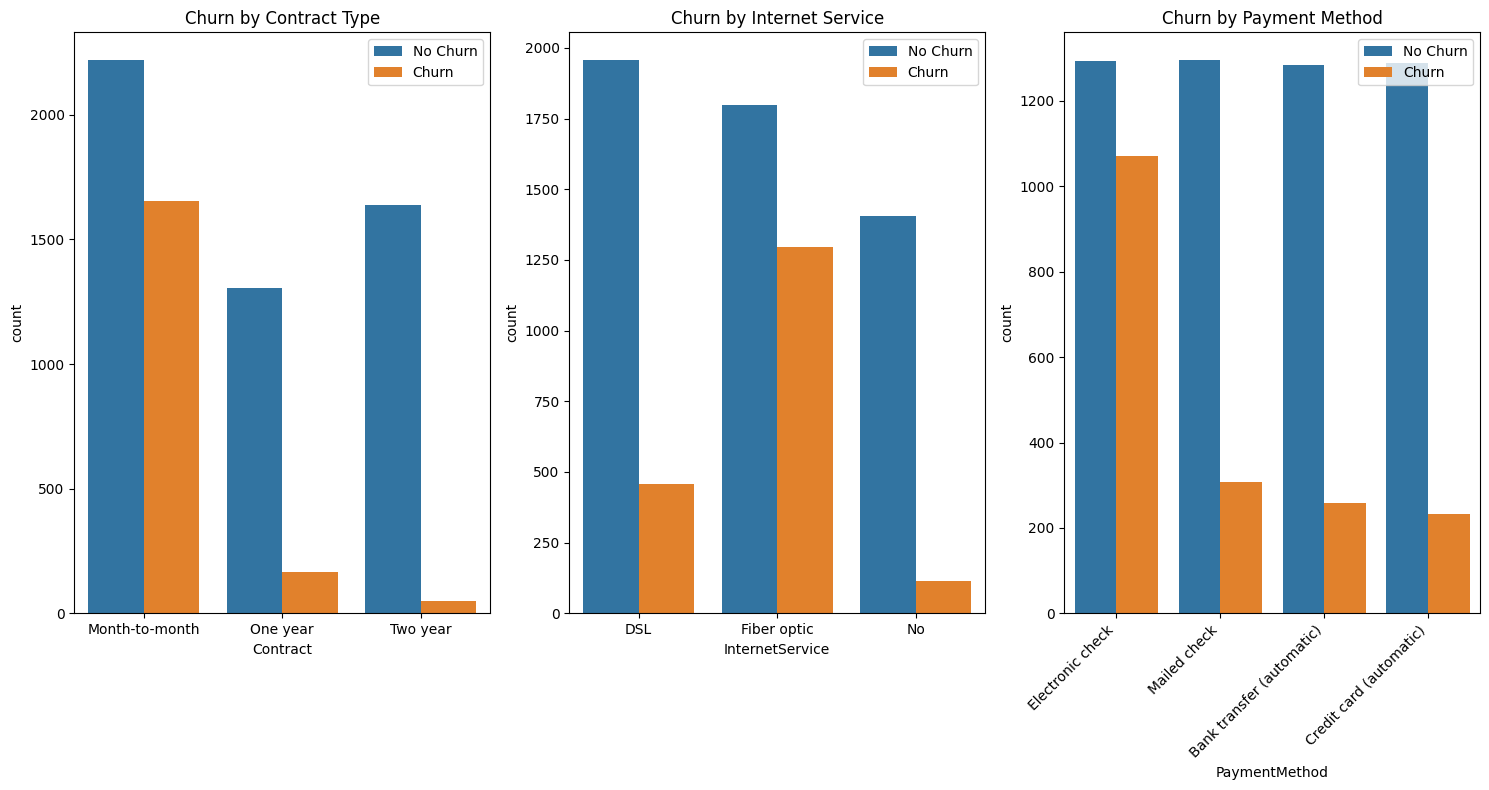

In [3]:
# --- Data Visualization ---

plt.figure(figsize=(15, 8))

# Plot 1: Churn by Contract Type
plt.subplot(1, 3, 1)
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.legend(['No Churn', 'Churn'])

# Plot 2: Churn by Internet Service
plt.subplot(1, 3, 2)
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.legend(['No Churn', 'Churn'])


# Plot 3: Churn by Payment Method
plt.subplot(1, 3, 3)
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(['No Churn', 'Churn'])


plt.tight_layout()
plt.show()

Model Accuracy: 0.7875

Confusion Matrix:


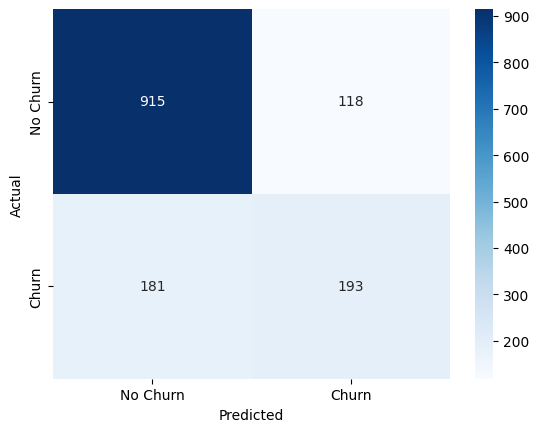


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1033
       Churn       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# 1. Separate features (X) and target (y)
# X contains all columns except 'Churn'
X = df_dummies.drop('Churn', axis=1)
# y contains only the 'Churn' column
y = df_dummies['Churn']

# 2. Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the numerical features
# This helps the model converge faster and perform better
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 5. Make predictions on the test data
y_pred = model.predict(X_test)

# 6. Evaluate the model's performance
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))